### Aula prática 1 - Análise exploratória de dados

In [196]:
# importando bibliotecas 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# lendo a tabela no formato xlsx
table = pd.read_excel('aula1.xlsx')

In [198]:
# imprimindo as 5 primeiras linhas da tabela
table.head()

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
0,CLI_0001,mau,44.0,MG,PROP,5.0,1,CAS,SEC,6040,sim
1,CLI_0002,bom,46.0,MG,ALUG,12.0,1,CAS,SUP,6986,sim
2,CLI_0003,bom,56.0,MG,PROP,12.0,1,CAS,SUP,8797,sim
3,CLI_0004,bom,31.0,RJ,ALUG,4.0,1,CAS,SEC,4968,sim
4,CLI_0005,bom,46.0,RJ,PROP,8.0,1,CAS,NaN,7430,sim


In [199]:
colunas = [column for column in table.columns]

print('Colunas presentes no dataset')

for coluna in colunas: print(coluna)

Colunas presentes no dataset
CLIENTE
STATUS
IDADE
UNIFED
RESID
TMPRSD
FONE
ECIV
INSTRU
RNDTOT
RST


In [200]:
table.dtypes

CLIENTE     object
STATUS      object
IDADE      float64
UNIFED      object
RESID       object
TMPRSD     float64
FONE         int64
ECIV        object
INSTRU      object
RNDTOT       int64
RST         object
dtype: object

### Observações

Variáveis qualitativas
- UNIFED, RESID, FONE, ECIV, INSTRU, RST

Análise Exploratória das variáveis quantitativas
- IDADE,  TMPRSD, RNDTOT

Variável alvo: 
- STATUS (define se o cliente tem um bom ou mau histórico de crédito)

Variável de identificação dos clientes/instâncias
- CLIENTE


In [201]:
colunas_qualitativas = ['UNIFED', 'RESID', 'FONE', 'ECIV', 'INSTRU', 'RST']

# valores únicos de cada coluna qualitativa

for coluna in colunas_qualitativas:
    print(coluna, ':', table[coluna].unique())

UNIFED : ['MG' 'RJ' 'SC' 'SP' 'S.P.' 'BH']
RESID : ['PROP' 'ALUG' nan 'OUTR' 'pROP']
FONE : [1 0 2]
ECIV : ['CAS' 'VIUVO' 'CASAD' 'DIVORC' 'SOLT' 'NI' 'OUTROS']
INSTRU : ['SEC' 'SUP' nan 'PRIM']
RST : ['sim' 'nao' 2]


In [202]:
replace_map = {
    'UNIFED': {'S.P.': 'SP', 'BH': 'MG'},
    'RESID': {'pROP': 'PROP', np.nan: 'OUTR'},
    'ECIV': {'CAS': 'CASAD', 'NI': 'OUTROS'},
    'RST': {2: np.nan}
}

table.replace(replace_map, inplace=True)

In [203]:
for coluna in colunas_qualitativas:
    print(coluna, ':', table[coluna].unique())

UNIFED : ['MG' 'RJ' 'SC' 'SP']
RESID : ['PROP' 'ALUG' 'OUTR']
FONE : [1 0 2]
ECIV : ['CASAD' 'VIUVO' 'DIVORC' 'SOLT' 'OUTROS']
INSTRU : ['SEC' 'SUP' nan 'PRIM']
RST : ['sim' 'nao' nan]


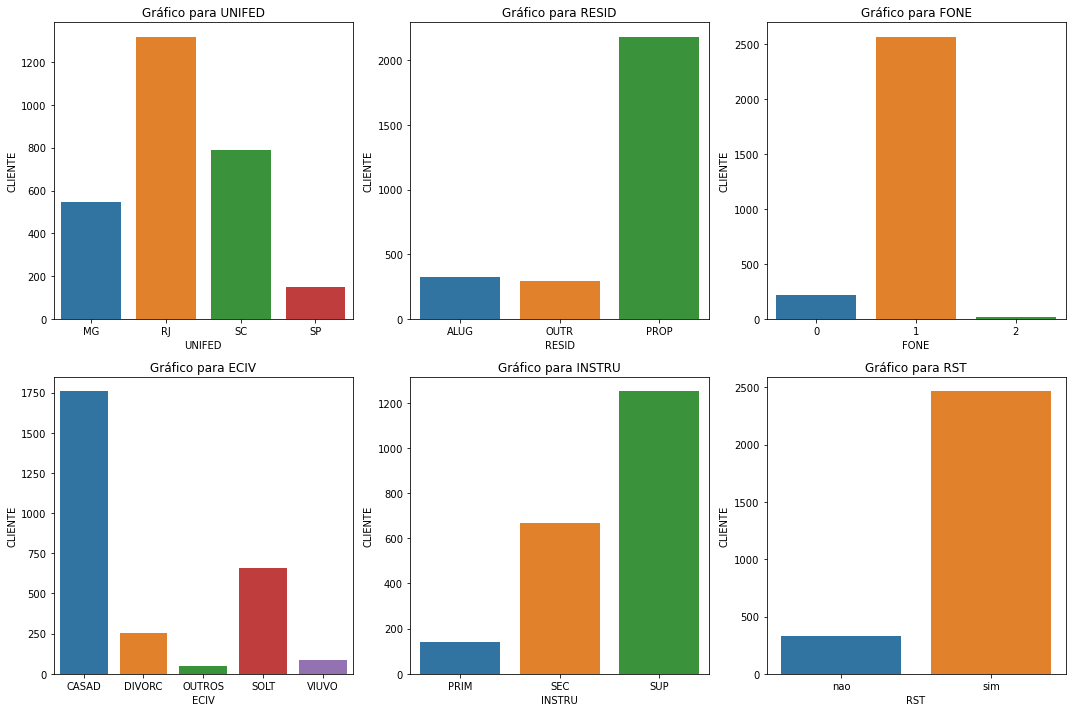

In [204]:
# Calcule o número de linhas e colunas necessárias com base na quantidade de colunas qualitativas
total_colunas = len(colunas_qualitativas)
colunas_por_linha = 3
total_linhas = math.ceil(total_colunas / colunas_por_linha)

# Crie a figura e subplots
fig, axs = plt.subplots(total_linhas, colunas_por_linha, figsize=(15, 5 * total_linhas))
plt.subplots_adjust(hspace=0)

# Itere pelas colunas qualitativas e plote os gráficos
for i, coluna in enumerate(colunas_qualitativas):
    linha = i // colunas_por_linha
    coluna_subplot = i % colunas_por_linha
    ax = axs[linha, coluna_subplot]

    count_coluna = table[['CLIENTE', coluna]].groupby(by=coluna, as_index=False).count()
    sns.barplot(data=count_coluna, x=coluna, y='CLIENTE', ax=ax)
    ax.set_title(f'Gráfico para {coluna}')

# Remova eixos vazios, se necessário
if total_colunas % colunas_por_linha != 0:
    for i in range(total_colunas, total_linhas * colunas_por_linha):
        fig.delaxes(axs.flatten()[i])

# Ajuste a disposição dos subplots
plt.tight_layout()
plt.show()


In [205]:
table.describe()

,IDADE,TMPRSD,FONE,RNDTOT
count,2797.000000,2795.000000,2800.000000,2800.000000
mean,42.402574,11.693739,0.929286,6645.136071
std,14.196867,9.026007,0.280355,1545.728336
min,0.000000,0.000000,0.000000,2239.000000
25%,31.000000,5.000000,1.000000,5478.750000
50%,40.000000,10.000000,1.000000,6500.500000
75%,53.000000,16.000000,1.000000,7681.000000
max,89.000000,57.000000,2.000000,23258.000000
